#  KNN近邻算法

In [1]:
# 数据准备
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris=datasets.load_iris()
x=iris.data
y=iris.target
#比过去的视频高了很多啊
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
# 构建模型
import  sklearn.neighbors 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
#训练
knn.fit(x_train,y_train)
#测试 预测结果
knn.predict(x_test)
acc=knn.score(x_test,y_test)
print(acc)

0.9333333333333333


# 通用数据集

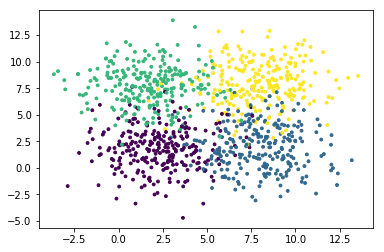

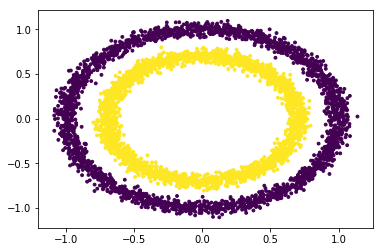

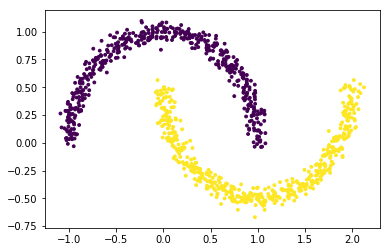

In [24]:
# 1.普通数据集 自己导入

# 2.数据集自行生成
### 簇
from sklearn import datasets
import matplotlib.pyplot as plt
centers=[[2,2],[8,2],[2,8],[8,8]]
#数量 维度 中心 方差
x,y=datasets.make_blobs(n_samples=1000,n_features=2,centers=centers,cluster_std=2)
plt.scatter(x[:,0],x[:,1],s=8,c=y)
plt.show()
### 同心圆 
# 数量 噪声 里面圆向外圆距离
x,y=datasets.make_circles(n_samples=5000,noise=0.04,factor=0.7)
plt.scatter(x[:,0],x[:,1],s=8,c=y)
plt.show()
### 月牙
x,y=datasets.make_moons(n_samples=1000,noise=0.05)
plt.scatter(x[:,0],x[:,1],s=8,c=y)
plt.show()
# 还有一个分类，懒得做了

#### 真实数据集#####
# 需要下载


In [30]:
# 线性回归和交叉验证
### 线性回归 Lasso (L1) 岭回归(L2) 弹性网(L1+L2)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

x,y=fetch_california_housing(return_X_y=True)
lr=LinearRegression()
#均方误差可能是负的
loss=-cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss)

lasso=Lasso(alpha=0.01)
#均方误差可能是负的
loss1=-cross_val_score(lasso,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss1)

ridge=Ridge(alpha=0.01)
#均方误差可能是负的
loss2=-cross_val_score(ridge,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss2)

elasticNet=ElasticNet(alpha=0.01)
#均方误差可能是负的
loss3=-cross_val_score(elasticNet,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss3)

0.14999 5.00001
0.5582901717686823
0.14999 5.00001
0.5640234205979412
0.14999 5.00001
0.5582900561705324
0.14999 5.00001
0.5603421342140539


(569, 30)
[ 45 147 250 352 455]
[ 45 147 250 352 455]


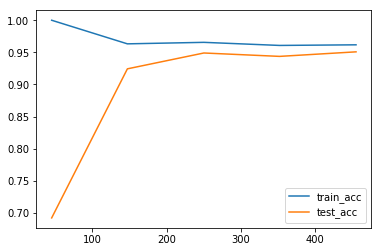

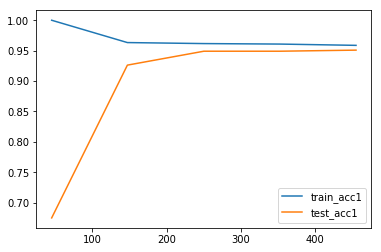

In [36]:
# 逻辑回归（作分类）与学习曲线
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
x,y=load_breast_cancer(return_X_y=True)
lrl1=LR(penalty="l1",solver="liblinear",C=1,max_iter=1000) # L1正则化必须改solver
lrl2=LR(penalty="l2",solver="liblinear",C=1,max_iter=1000) # GD迭代1000次，默认100下
train_size,train_acc,test_acc=learning_curve(lrl1,x,y,cv=5)
train_size1,train_acc1,test_acc1=learning_curve(lrl2,x,y,cv=5)
print(x.shape)
print(train_size)
print(train_size1)
# axis 因为运转5次会有5个结果得到均值
plt.plot(train_size,train_acc.mean(axis=1),label='train_acc')
# plt.legend()
# plt.show()
plt.plot(train_size,test_acc.mean(axis=1),label='test_acc')
plt.legend()
plt.show()
plt.plot(train_size1,train_acc1.mean(axis=1),label='train_acc1')
# plt.legend()
# plt.show()
plt.plot(train_size1,test_acc1.mean(axis=1),label='test_acc1')
plt.legend()
plt.show()
#竖向是准确率
#两条曲线的间距越小泛化能力越强

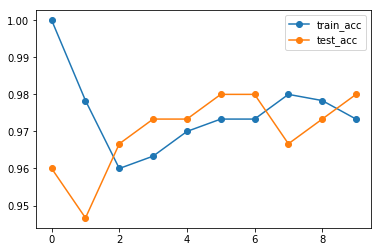

In [26]:
# 手动调参与参数验证曲线
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
#第二个是调参曲线
from sklearn.model_selection import cross_val_score,validation_curve
import matplotlib.pyplot as plt
x,y=load_iris(return_X_y=True)
acc=[]

# for i in range(1,11):
#     knn=KNeighborsClassifier(i)
#     acc.append(cross_val_score(knn,x,y,cv=5).mean())
    
# plt.plot(range(1,11),acc,'o-')
# plt.show()

#参数验证曲线
knn1=KNeighborsClassifier()
train_acc,test_acc=validation_curve(knn1,x,y,param_name='n_neighbors'
                                    ,param_range=range(1,11),cv=5)

# x1=range(1,11)
# y1=train_acc.mean(axis=1)
# print(len(x1))
# print(len(train_acc))
# plt.plot(x1, train_acc.mean(axis=1))
plt.plot(train_acc.mean(axis=1),'o-',label='train_acc')
plt.plot(test_acc.mean(axis=1),'o-',label='test_acc')
plt.legend()
plt.show()

In [46]:
#数据预处理
from sklearn import datasets,preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X,y=load_iris(return_X_y=True)
# random是为了让数据集固定
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=13)
knn=KNeighborsClassifier().fit(x_train,y_train)
print(knn.score(x_test,y_test))
#标准化
X,y=load_iris(return_X_y=True)
X=preprocessing.StandardScaler().fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=13)
knn=KNeighborsClassifier().fit(x_train,y_train)
print(knn.score(x_test,y_test))
#归一化 缩放到一个范围内
X,y=load_iris(return_X_y=True)
X=preprocessing.MinMaxScaler().fit_transform(X)
# X=preprocessing.minmax_scale(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=13)
knn=KNeighborsClassifier().fit(x_train,y_train)
print(knn.score(x_test,y_test))
#处理异常值
X,y=load_iris(return_X_y=True)
X=preprocessing.RobustScaler().fit_transform(X)
# X=preprocessing.minmax_scale(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=13)
knn=KNeighborsClassifier().fit(x_train,y_train)
print(knn.score(x_test,y_test))
# 稀疏矩阵的处理，有很多缺失值，缩放到[-1,1]
X,y=load_iris(return_X_y=True)
X=preprocessing.maxabs_scale(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=13)
knn=KNeighborsClassifier().fit(x_train,y_train)
print(knn.score(x_test,y_test))

# 缺失值的库
from sklearn.impute import SimpleImputer
X=SimpleImputer().fit_transform(X)
# missing_values 把什么看做缺失值 
# strategy='mean' 平均值,strategy='median' 中位数,strategy='most_frequent' 众数
#,strategy='constant' 常数，如果是是常数那么fill_value=None要确定一个值

# X=SimpleImputer().fit_transform(X

####
# data.loc 直接填充
# data.dropna 直接删除
###

0.85
0.9
0.95
0.85
0.95


In [69]:
# 降维
# PCA SVD

# from sklearn.decomposition import PCA
# from sklearn.datasets import load_iris
# import matplotlib.pyplot as plt
# iris=load_iris()
# x=iris.data
# y=iris.target

# # 根据信息保存率玩维度
# pca=PCA(2) #这是需要降低的维数
# x=pca.fit_transform(x)
# # pca=PCA(n_components=0.95,svd_solver='full')
# # x=pca.fit_transform(x)
# # print(x.shape)

# plt.figure()
# # 第0类样本 第0维度特征，第1维度特征
# plt.scatter(x[y==0,0],x[y==0,1],c="r",label=iris.target_names[0])
# # 第1类样本 第0维度特征，第1维度特征
# plt.scatter(x[y==1,0],x[y==1,1],c="b",label=iris.target_names[1])
# # 第2类样本 第0维度特征，第1维度特征
# plt.scatter(x[y==2,0],x[y==2,1],c="y",label=iris.target_names[2])
# plt.legend()
# plt.title("PCA of iris")
# plt.show()

# 如果PCA计算协方差矩阵，因此矩阵太大，资源计算不够，可以尝试SVD
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
y=iris.target
# print(x.shape)
svd=TruncatedSVD(2)
x=svd.fit_transform(x)
print(x.shape)

(150, 2)


In [70]:
# SVM

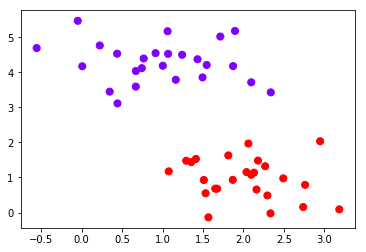

0.9800000000000001
1.0


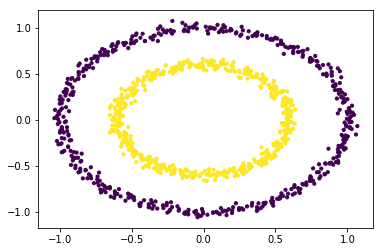

0.48
1.0


In [75]:
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import datasets
# import matplotlib.pyplot as plt
# centers=[[2,2],[8,2],[2,8],[8,8]]
#数量 维度 中心 方差
x,y=datasets.make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(x[:,0],x[:,1],s=50,c=y,cmap='rainbow')
plt.show()
print(cross_val_score(LinearSVC(),x,y,cv=5,scoring='accuracy').mean())
print(cross_val_score(SVC(kernel='linear'),x,y,cv=5,scoring='accuracy').mean())

x,y=datasets.make_circles(n_samples=1000,noise=0.03,factor=0.6)
plt.scatter(x[:,0],x[:,1],s=10,c=y)
plt.show()
print(cross_val_score(SVC(kernel='linear'),x,y,cv=5,scoring='accuracy').mean())
print(cross_val_score(SVC(kernel='rbf'),x,y,cv=5,scoring='accuracy').mean())

In [77]:
# 朴素贝叶斯
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB,BernoulliNB
x,y=datasets.load_digits(return_X_y=True)
print(cross_val_score(GaussianNB(),x,y,cv=5,scoring='accuracy').mean())
print(cross_val_score(BernoulliNB(),x,y,cv=5,scoring='accuracy').mean())

0.8069281956050759
0.8241736304549674


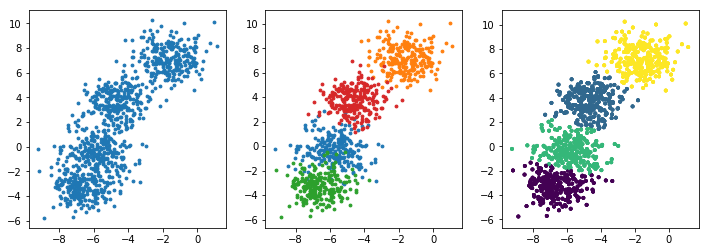

0.4933462526132956
0.5251469712039056


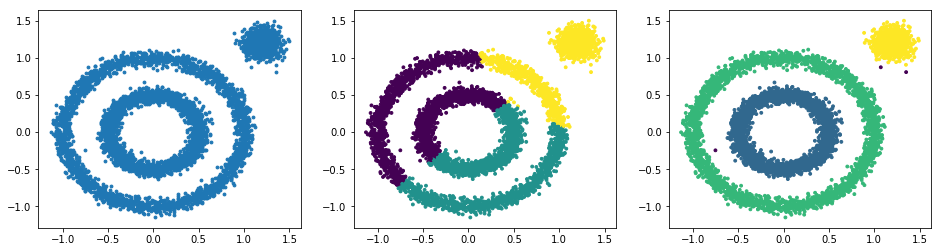

In [87]:
#### 这个掌握不太熟练

#聚类分析
#K-MEANS + DBSCAN
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
x,y=datasets.make_blobs(n_samples=1000,n_features=2, centers=4,random_state=22)
fig,ax=plt.subplots(1,3,figsize=(12,4))
ax[0].scatter(x[:,0],x[:,1],s=8)
color=["r","green","b","orange"]
for i in range(4):
    ax[1].scatter(x[y==i,0],x[y==i,1],s=8)
pred=KMeans(n_clusters=4,random_state=22).fit_predict(x)
for i in range(4):
    ax[2].scatter(x[:,0],x[:,1],s=8,c=pred)
plt.show()
print(silhouette_score(x,y))
print(silhouette_score(x,pred))

# DBSCAN算法 运转功能极其不错
# centerst=[[1.2,1.2]]
x1,_=datasets.make_circles(n_samples=5000,noise=0.05,factor=0.5)
x2,_=datasets.make_blobs(n_samples=1000,n_features=2, centers=[[1.2,1.2]],cluster_std=0.1)
fig,ax=plt.subplots(1,3,figsize=(16,4))
x=np.concatenate((x1,x2))
ax[0].scatter(x[:,0],x[:,1],s=8)
pred=KMeans(n_clusters=3).fit_predict(x)
ax[1].scatter(x[:,0],x[:,1],s=8,c=pred)
# 降低eps值 提高min_sample值，可以提高这个算法的效率
pred=DBSCAN(eps=0.1,min_samples=10).fit_predict(x) #提高成蔟条件，减小领域，增大样本要求
ax[2].scatter(x[:,0],x[:,1],s=8,c=pred)
plt.show()

In [91]:
# 神经网络
# 学习能力强，计算资源大，运转时间慢，还是使用深度学习运转好
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
x,y=fetch_california_housing(return_X_y=True)
print(x.shape)
NN=MLPRegressor(hidden_layer_sizes=(100,),random_state=22)
loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print(loss)
NN=MLPRegressor(hidden_layer_sizes=(100,100),random_state=22)
loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print(loss)
NN=MLPRegressor(hidden_layer_sizes=(150,),random_state=22)
loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print(loss)
NN=MLPRegressor(hidden_layer_sizes=(50,),random_state=22)
loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print(loss)
NN=MLPRegressor(hidden_layer_sizes=(16,),random_state=22)
loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print(loss)

(20640, 8)
0.8384502639817677
3.425374472601905
1.3729017144312192
0.6867883583636812
0.6464623806087815


In [100]:
# 决策树
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.model_selection import train_test_split
wine=load_wine()
x_train,x_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.3,random_state=22)
# criterion 判定标准 splitter 是选取特征 random特征较多可以帮助过拟合
clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=22,splitter='random'
#                                ,max_depth=10,min_samples_leaf=3,min_samples_split=3
                               ) #方便剪叶子  不剪叶子效果不错
clf.fit(x_train,y_train)
acc=clf.score(x_test,y_test)
print(acc)
# 绘制决策树（太懒了，不想写）
# ex_grap=tree.export_graphviz(clf,feature_names=[],) 太懒了不想写，自己百度去吧

0.9814814814814815


In [109]:
#集成学习
#bagging  模型独立，共同决策  100个决策树 40 A, 60 B  则该数据集是60
#boosting 模型有序，逐渐提升  第一颗决策树 60%是正确的，40%错误的（加权重） 
#逐渐决策树，拿到前面决策树的不好结果
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# 集成模块
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
wine=load_wine()
x_train,x_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.3,random_state=0)
dtc=DecisionTreeClassifier(random_state=22).fit(x_train,y_train)
#随机森林
rfc=RandomForestClassifier(random_state=22).fit(x_train,y_train)
print(dtc.score(x_test,y_test))
print(rfc.score(x_test,y_test))
#集成模块
bgc=BaggingClassifier(random_state=22).fit(x_train,y_train)
adc=AdaBoostClassifier(learning_rate=0.1,random_state=22).fit(x_train,y_train)
print(bgc.score(x_test,y_test))
print(adc.score(x_test,y_test))

0.9259259259259259
0.9814814814814815
0.9814814814814815
0.9814814814814815


In [121]:
# xgboost
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as MSE
# 自己命令行下载好太多了
import xgboost
x,y=fetch_california_housing(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
dtrain=xgboost.DMatrix(x_train,y_train)
dtest=xgboost.DMatrix(x_test,y_test)
# silent默认是true False将建树过程给弄出来,objective 默认是分类， eta学习率
param={'silent':False,'objective':'reg:linear' #默认是分类，这个是搞回归
       ,"eta":0.1}
xgb=xgboost.train(param,dtrain,num_boost_round=175)
pred=xgb.predict(dtest)
print(MSE(y_test,pred)) #如果接近0.3 
# xgboost可以说是大杀器，在一些比赛去玩玩，多参加一些小比赛

[16:56:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.20682373460421405


In [126]:
# 保存与加载
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import joblib
x,y=load_iris(return_X_y=True)
clf=SVC().fit(x,y)
print(clf.score(x,y))
#保存
joblib.dump(clf,'svc.pkl')
clf2=joblib.load('svc.pkl')
print(clf2.score(x,y))

0.9733333333333334
0.9733333333333334
